## Упражнение 1
Изначально в директории должны присутсвоватьь файлы out.txt и task1.txt, чтобы все работало корректно

In [1]:
mmm = open('out.txt', 'w')
with open('task1.txt') as file:
    for line in file:
        m = list(map(float, line.strip().split()))
        sr = (sum(m)/len(m))
        mmm.write('%s \n' % str(sr))
mmm.close()

## Упражнение 2

In [238]:
def sift_down(heap,i, n):
    while i * 2 +1 < n:
        j = i
        if heap[i] < heap[i*2 +1]:
            j = i*2 + 1
        if i * 2 + 2 < n and heap[j] < heap[i * 2 + 2]:
            j = i*2 +2
        if i == j:
            break
        heap[i], heap[j] = heap[j], heap[i]
        i = j

from math import ceil

def build(heap, n):
    for i in range(ceil((len(heap))/2), -1, -1):
        sift_down(heap, i, n)
        
def heapsort(A):
    build(A, len(A))
    for i in range(len(A)-1, 0, -1):
        A[0], A[i] = A[i], A[0]
        build(A, i)
    return None

In [239]:
def insertion(data):
    for i in range(len(data)):
        j = i - 1 
        key = data[i]
        while data[j] > key and j >= 0:
            data[j + 1] = data[j]
            j -= 1
        data[j + 1] = key
    return None

In [64]:
import matplotlib.pyplot as plt
import time

In [139]:
ins = []
hea = []
sor = []
x = []

for k in range(1, 300, 10):
    a = [i for i in range(k, -1, -1)]
    b = [i for i in range(k, -1 , -1)]
    c = [i for i in range(k, -1, -1)]
    
    start = time.time()
    heapsort(b)
    end = time.time()
    hea.append(end - start)
    
    start = time.time()
    c.sort()
    end = time.time()
    sor.append(end - start)
    
    start = time.time()
    insertion(a)
    end = time.time()
    ins.append(end - start)
    
    
    
    x.append(k)

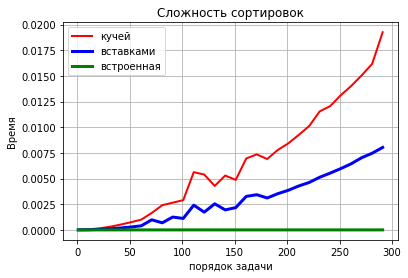

In [140]:
plt.plot(x, hea, label='кучей', color='red', linewidth=2)
plt.plot(x, ins, label='вставками', color='blue', linewidth=3)
plt.plot(x, sor, label='встроенная', color='g', linewidth=3)

plt.title('Сложность сортировок')
plt.xlabel('порядок задачи')
plt.ylabel('Время')

plt.grid()  # сетка по отметкам на осях
plt.legend()  # подписи графиков

plt.show()

In [136]:
from collections import deque
li = []
da = []
dp = []
lp = []
x2 = []
for k in range(2, 5000, 100):
    a = [i for i in range(k, -1, -1)]
    b = deque(i for i in range(k, -1, -1))
    c = deque(i for i in range(k, -1, -1))
    d = [i for i in range(k, -1, -1)]

    start = time.time()
    a.insert(666, 0)
    end = time.time()
    li.append(end - start)
    
    start = time.time()
    b.appendleft(666)
    end = time.time()
    da.append(end - start)
    
    start = time.time()
    c.popleft()
    end = time.time()
    dp.append(end - start)
    
    start = time.time()
    d.pop(0)
    end = time.time()
    lp.append(end - start)
    
    x2.append(k)

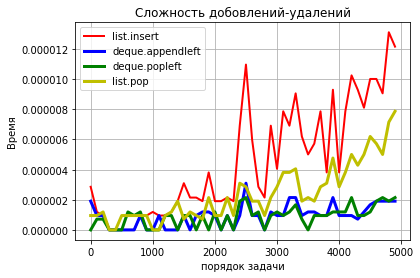

In [108]:
plt.plot(x2, li, label='list.insert', color='red', linewidth=2)
plt.plot(x2, da, label='deque.appendleft', color='blue', linewidth=3)
plt.plot(x2, dp, label='deque.popleft', color='g', linewidth=3)
plt.plot(x2, lp, label='list.pop', color='y', linewidth=3)

plt.title('Сложность добовлений-удалений')
plt.xlabel('порядок задачи')
plt.ylabel('Время')

plt.grid()  # сетка по отметкам на осях
plt.legend()  # подписи графиков

plt.show()

In [124]:
el = []
se = []
x3 = []
for s in range(2, 25000, 100):
    a = [i for i in range(s, -1, -1)]
    d = (i for i in range(s, -1, -1))

    start = time.time()
    f = 666 in a
    end = time.time()
    el.append(end - start)
    
    start = time.time()
    f = 666 in d
    end = time.time()
    se.append(end - start)
    
    x3.append(s)

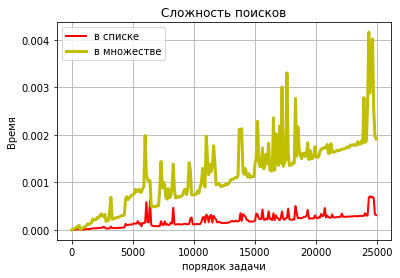

In [125]:
plt.plot(x3, el, label='в списке', color='red', linewidth=2)

plt.plot(x3, se, label='в множестве', color='y', linewidth=3)

plt.title('Сложность поисков')
plt.xlabel('порядок задачи')
plt.ylabel('Время')

plt.grid()  # сетка по отметкам на осях
plt.legend()  # подписи графиков

plt.show()

### Кривая Коха

Введите порядок, начиная с 0: 3


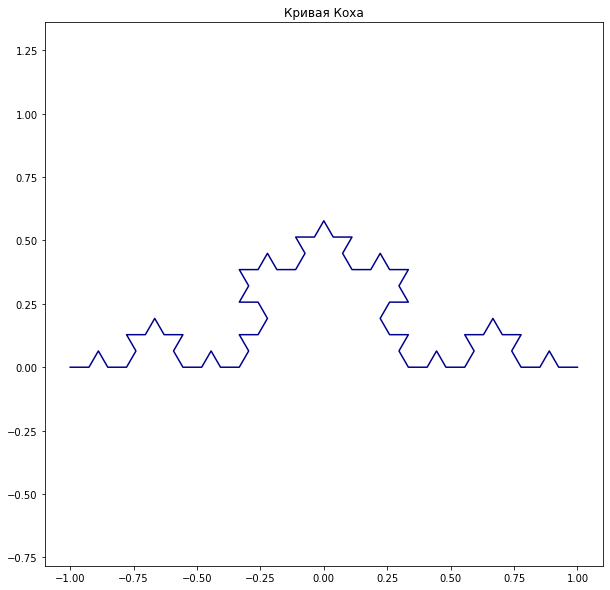

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def koch_line(n):
    def koch_line2(n):
        if n == 0:
            angles = np.array([0, 180])
            return np.exp(np.deg2rad(angles) * 1j)
        else:
            z = 0.5 - 0.5j * np.sqrt(3) / 3
            p1 = koch_line2(n - 1)  
            p2 = np.roll(p1, shift=-1) #делаем тот же список, но сдвигаем элементы на 1 позицию
            p2[len(p2)-1] = p1[len(p2)-1] #убираем вектор, соед первую и посл точки
            dp = p2 - p1 # вектор, соед соседние точки 

            new = np.empty(len(p1) * 4, dtype=np.complex) 
            new[::4] = p1
            new[1::4] = p1 + dp / 3   #нужно впихнуть по 3 нов точки м/у всеми парами старых
            new[2::4] = p1 + dp * z
            new[3::4] = p1 + dp / 3 * 2
            return new

    points = koch_line2(n)
    x, y = points.real, points.imag
    return x, y

m = int(input('Введите порядок, начиная с 0: '))

x, y = koch_line(n=m)

plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.title('Кривая Коха')
plt.plot(x, y, 'darkblue')
plt.show()

###  Снежинка Коха

Введите порядок, начиная с 0: 5


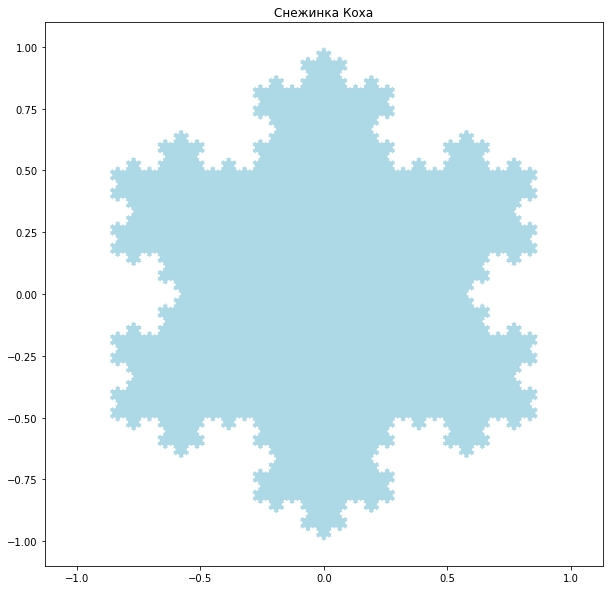

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pylab


def koch_snowflake(n):
    def koch_snowflake2(n):
        if n == 0:
            angles = np.array([90, 210, 330])
            return np.exp(np.deg2rad(angles) * 1j)
        else:
            z = 0.5 - 0.5j * np.sqrt(3) / 3
            p1 = koch_snowflake2(n - 1)  
            p2 = np.roll(p1, shift=-1) #делаем тот же список, но сдвигаем элементы на 1 позицию
            dp = p2 - p1 # вектор, соед соседние точки 
            
            new = np.empty(len(p1) * 4, dtype=np.complex) 
            new[::4] = p1
            new[1::4] = p1 + dp / 3   #нужно впихнуть по 3 нов точки м/у всеми парами старых
            new[2::4] = p1 + dp * z
            new[3::4] = p1 + dp / 3 * 2
            return new

    points = koch_snowflake2(n)
    x, y = points.real, points.imag
    return x, y

m = int(input('Введите порядок, начиная с 0: '))
x, y = koch_snowflake(n=m)

plt.figure(figsize=(10, 10))
plt.title('Снежинка Коха')
plt.axis('equal')
plt.fill(x, y, 'lightblue')
plt.show()

### Опять калькулятор

In [240]:
def solve(s):
    return eval(s)
s = ('3 - 3 * (8 + 1)')

print(solve(s))

-24


## Дешифровка Цезаря
- Результат работы программы записывается с файл __out.txt__, которым мы пользовались в упражнении 1
- Опытным путем выяснилось, что двигать надо на 3

In [231]:

file = open('ceasar.txt')
for line in file:
    s += line
    s += '\n'
    
itog = open('out.txt', 'w')

def enc(n, x):
    return chr(ord('A') +(ord(x) - ord('A') + n)%(ord('Z')-ord('A')+1))
z = [' ', '/"', "/'", '.', ',', '-', '/n']
for i in range(len(s)):
    x = s[i]
    if x not in z:
        itog.write(enc(3, x))
    else:
        itog.write(x)

file.close()
itog.close()


#Вывод получившегося файла закомментирован из-за своей громоздкости
#file = open('out.txt')   
#for line in file:
#    print(repr(line))

## Рыба
- Получилось, что рыбий белок имеет номер три!!!

In [223]:
def f(a, b):
    if a == b:
        return 0
    return 1

def lev(a, b):
    n = len(a)
    m = len(b)
    l = [[] for i in range (m+1)]
    for i in range(m+1):
        for k in range(n+1):
            l[i].append(0)
    
    for i in range(n+1):
        l[0][i] = i
    for i in range(m+1):
        l[i][0] = i
        
    for i in range(1, n+1):
        for k in range(1, m+1):
            l[k][i] = min(l[k-1][i]+1, l[k][i-1]+1, l[k-1][i-1]+(f(a[i-1], b[k-1])))
    return l[m][n]

In [236]:
a = "MDGAGNLTISSASNITCNDTIDDFRNQVYSTLYSMISVVGFFGNGFVLYVLIKTYHEKSAFQIYMINLAVSDLLCVCTLPLRVVYYVHKGIWFFGDFLCRLSTYALYVNLYCSIFFMTAMSFFRCIAIVFPVQNINLVTQKKARFVCVSIWIFVILTSSPFLMSTPYKDEKNNTKCFEPPQDNQAKNHILVLHYVSLFIGFIIPFIIIIICYTMIILTLLKNSMKKNLSSRKKAIGMIIIVTAAFLISFMPYHIQRTIHLHFLHNETKPCDSVLRMQKSVVITLSLAASNCCFDPLLYFFSGGNFRRRLSTFRKHSLSSMTYVPKKKASLPEKGDEIC"
b = "MDGTGNLTVSSATCHDTIDEFRNQVYSTLYSMISVVGFFGNGFVLYVLIKTYHEKSAFQIYMINLAIADLLCVCTLPLRVVYYVHKGIWFFGDFLCRLSTYALYVNLYCSIFFMTAMSFFRCIAIVFPVQNINLVTQKKARFVCVGIWIFVILASSPFLITKSYKDEKNNTKCFEPPQDNQTKNHVLILHYVSLFLGFIIPFVIIIVCYTMIILTLLKKSMKKNPSSHKKAIRMIMVVTAAFLVSFMPYHIQRTIHLHFLHNETKPCDSVLRMQKSVVITLSLAASNCCFDPLLYFFSGGNFRRRLSTFRKHSLSSMTYVPRKKASLPEKGEEICKHFV"
c = "MDNSTKCESIDDFRNQVYSTAYSLITVLGLVGNGFALVVLVRTYRQSSPFHVYMLNLAVSDLLCVMTLPLRVLYYVKKGDWNQGDFLCRISSYALYVNLYCSIYFMAAMSVTRFLAIVFPVQNLRLVTENRARLVCGAIWVVICLLSSPFLISGQKFDPVTNKTKCFEPPPPGKSLTKLITLNYVSLMIGFVLPFLIILLCYAGIVRTLLSRTHAARRQRGTGTKAIRMIVIVLLTFLVSFMPYHVQRTVHLNSLSRVNATHCETVSMQKSVVVTLCLAAANSCFDPLLYFFSGEGFRSRLSSLRHSVKSSTMRRTNRLKPITGSDSGENHQLKTG"
d = "MDETGNLTVSSATCHDTIDDFRNQVYSTLYSMISVVGFFGNGFVLYVLIKTYHKKSAFQVYMINLAVADLLCVCTLPLRVVYYVHKGIWLFGDFLCRLSTYALYVNLYCSIFFMTAMSFFRCIAIVFPVQNINLVTQKKARFVCVGIWIFVILTSSPFLMAKPQKDEKNNTKCFEPPQDNQTKNHVLVLHYVSLFVGFIIPFVIIIVCYTMIILTLLKKSMKKNLSSHKKAIGMIMVVTAAFLVSFMPYHIQRTIHLHFLHNETKPCDSVLRMQKSVVITLSLAASNCCFDPLLYFFSGGNFRKRLSTFRKHSLSSVTYVPRKKASLPEKGEEICKV"

print("Сейчас будут расстояния Левештейна, приготовьтесь и пристегните ремни:")
print(lev(a, b), '- 1 and 2')
print(lev(a, c), '- 1 and 3')
print(lev(a, d), '- 1 and 4')
print(lev(b, c), '- 2 and 3')
print(lev(b, d), '- 2 and 4')
print(lev(c, d), '- 3 and 4')
print("Очевидно, что рыба - образец номер 3")

Сейчас будут расстояния Левештейна, приготовьтесь и пристегните ремни:
34 - 1 and 2
155 - 1 and 3
31 - 1 and 4
154 - 2 and 3
19 - 2 and 4
153 - 3 and 4
Очевидно, что рыба - образец номер 3
